# Practical Linear Algebra for Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc

rc("animation", html="jshtml")


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io, color

# convolution
from scipy.signal import convolve2d
from scipy.linalg import hilbert

import scipy


import pandas as pd
import sympy as sym
import time


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats(
    "svg"
)  # display figures in vector format
plt.rcParams.update({"font.size": 14})  # set global font size

###### ============================
# Chapter 14
## SVD
SVD is for all matrices, and not just square matrcies, as opposed to Eigendecomp.
$$A = U \Sigma V^T$$

$U$ is left singular vectors, $V$ is right singular vectors, and $\Sigma$ are the matrix of singular values.

For $A_{M\times N}$ with rank $r$, $U_{M\times M}$, $\Sigma_{M\times N}$ diagonal, $V_{N\times N}$:
- Both $U$ and $V$ are square matrices (even if A is not)
- Both $U$ and $V$ are orthogonal ($U^TU=I$ and $V^TV=i$)
- First $r$ columns of $U$, are the orthogonal basis of column space of $A$. and the rest of the columns provide orthogonal basis of the left null-space of $A$. If $r=M$, then the null-space is empty.
- First $r$ rows of $V^T$ are the orthogonal basis of row space of $A$. and the rest of the columns provide orthogonal basis of the left null-space of $A$. If $r=N$, then the null-space is empty.
- $\Sigma$ is always diagonal and same size as $A$. The singular values are always sorted from the largest to the smallest.
- All singular values are positive and real-valued.
- Number of nonzero singular values equals $r$.

>> U,s,Vt = np.linalg.svd(A)

The singular values are retuned as a vector, not a matrix.

>> S=np.zeros(A.shape)

>> np.fill_diagonal(S,s)

Numpy returns $V^T$ and not $V$.

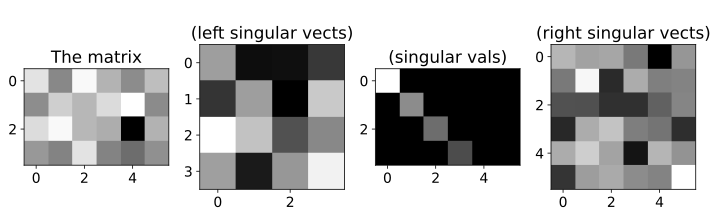

In [2]:
A = np.random.randn(4, 6)

# its SVD
U, s, Vt = np.linalg.svd(A)

# create Sigma from sigma's
S = np.zeros(np.shape(A))
np.fill_diagonal(S, s)


# show the matrices
_, axs = plt.subplots(1, 4, figsize=(10, 6))

axs[0].imshow(A, cmap="gray", aspect="equal")
axs[0].set_title("\nThe matrix")

axs[1].imshow(U, cmap="gray", aspect="equal")
axs[1].set_title("\n(left singular vects)")

axs[2].imshow(S, cmap="gray", aspect="equal")
axs[2].set_title("\n(singular vals)")

axs[3].imshow(Vt, cmap="gray", aspect="equal")
axs[3].set_title("\n(right singular vects)")

plt.tight_layout()
plt.show()

In [3]:
# Ecer 3
# Orthogonal matrices does not scale vector. Only rotates them

A = np.random.randn(5, 5)

U, s, Vt = np.linalg.svd(A)

v = np.random.randn(5, 1)

print(f"Norm of v: {np.round(np.linalg.norm(v),4)}")
print(f"Norm of Uv: {np.round(np.linalg.norm(U@v),4)}")

Norm of v: 1.3344
Norm of Uv: 1.3344


###### ============================
### SVD and Rank-1 of a Matrix

- $Av=\sigma u$: $u$ is in the column space of $A$, and $v$ provides the weights of combining the columns.
- $u^TA=\sigma v^T$: $v$ is in the row space of $A$, and $u$ provides the weights of combining the columns.

So the interpretion is similar to eignevalues $Av=\lambda v$, but here we say that multiplication of the matrix to a vector is the same as a scalar to another vector.


What will happen if we outer product the first column of $U$ with the first singular value and the first row of $V^T$:

$$A_1=u_1\sigma_1v^T_1$$

So $A_1$ is the matrix of rank 1 of the most largest sigular value of $A$.

$A_1$ has the same shape as $A$. $A$ then can be reconstructed as the some of all rank-1 matrixes created by the singular values:

$$A=\sum \limits_{i=1}^r u_i\sigma_iv^T_i$$

#### Low-Rank Approximation

So if we use only $k<r$ of the singular values to create $\hat{A}$, then it is the low-rank approximation of $A$. The idea is that the information corrsponding to small singular values makes little contirbution to toal variance of the data set, then it can reflects noise that can be removed.

###### ============================
### Calculating SVD from Eigenvalues

SVD simply comes from the eigendecomposition of a matrix and it transpsose $AA^T$.

$$AA^T=U\Sigma^2U^T$$
So the eigenvectors of $AA^T$ are the left singular vectors of $A$ and the squared eigenvalues of $AA^T$ are the singular values of A. Then $V^T=\Sigma^{-1}U^TA$

- Singular values are positive becauase sqaured of eigenvalues are positivr
- Simgular values are real-valued, because the matrix $AA^T$ is symmetric
- Singular vectors are orthogonal, because the eigenvectr of symm matrix are orthogonal

### SVD of $A^TA$
If a matrix can be express as $S=A^TA$, then $U=V$.

<u> The SVD of a symmetric matrix is the same as its eigendecomposition.</u>

In [4]:
# Exer 1
A = np.random.randn(3, 3)
A = A.T @ A

L, V = np.linalg.eigh(A)
U, s, Vt = np.linalg.svd(A)


sidx = np.argsort(L)[::-1]
print(sidx)
L = L[sidx]
V = V[:, sidx]

print(f"U and V are the same U-V in SVD = \n{np.round(U-Vt.T)}\n")

print(f"Eigenvalues of A:\n{np.round(L,2)}")
print(f"Eigenvector of A:\n{V}\n")
print(f"Singular values of A:\n{np.round(s,2)}")
print(f"Singular Vectors of A:\n{U}")

[2 1 0]
U and V are the same U-V in SVD = 
[[ 0.  0.  0.]
 [-0.  0. -0.]
 [ 0.  0. -0.]]

Eigenvalues of A:
[5.2  1.76 0.2 ]
Eigenvector of A:
[[-0.09699989  0.46880576  0.8779591 ]
 [-0.84293751  0.43032872 -0.32291416]
 [ 0.52919503  0.77138729 -0.35343212]]

Singular values of A:
[5.2  1.76 0.2 ]
Singular Vectors of A:
[[-0.09699989  0.46880576 -0.8779591 ]
 [-0.84293751  0.43032872  0.32291416]
 [ 0.52919503  0.77138729  0.35343212]]


In [5]:
# Exer 2
# Using the function below, instaed of having an NXN U or V, it is truncated only to the rank of matrix
# sizes (try tall and wide)
m = 10
n = 4
print("Without Truncation")
# random matrix and its economy (aka reduced) SVD
A = np.random.randn(m, n)
U, s, Vt = np.linalg.svd(A)

# print sizes
print(f"Size of A:  {A.shape}")
print(f"Size of U:  {U.shape}")
print(f"Size of V': {Vt.shape}")

print("With Truncation")
# random matrix and its economy (aka reduced) SVD
U, s, Vt = np.linalg.svd(A, full_matrices=False)

# print sizes
print(f"Size of A:  {A.shape}")
print(f"Size of U:  {U.shape}")
print(f"Size of V': {Vt.shape}")

Without Truncation
Size of A:  (10, 4)
Size of U:  (10, 10)
Size of V': (4, 4)
With Truncation
Size of A:  (10, 4)
Size of U:  (10, 4)
Size of V': (4, 4)


###### ============================
### Converting Singular values to Variance

The sum of singular values is the total amount of "variance" in the matrix.

The percent total variance by one singular value $\sigma_i$:
$$\tilde{\sigma_i} = \frac{100\sigma_i}{\sum \sigma}$$

### Condition Number

It is used to indicate the numerical stability of a matrix.

$$\kappa = \frac{\sigma_{\max}}{\sigma_{\min}}$$

- Noninvertible matrices have NAN condition number because one of the SVD is zero.
- <u>Ill-conditioned Matrix</u>: A full rank matrix, with large condition number, is still unstable and it's invert is unreliable. these types of matrices tends toward being singular, hence the numerical errors goes up.

### Inverse and Pseudo-Inverse

$$A^{-1}=V\Sigma^{-1}U^T$$

and the $\Sigma^{-1}$ is calculated by inverting each singular value on the diagonal.

The <u>Pseuo-inverse</u> is also the same as above, but we only invert the nonzero values of the singular values.


Condition Number of A is:10.0


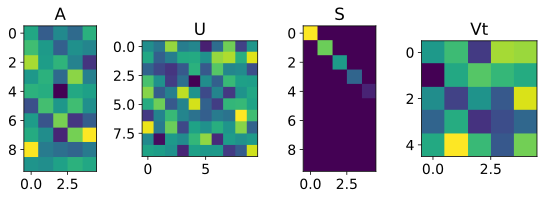

In [6]:
# Exer 4
k = 10
M = 10
N = 5

U, _ = np.linalg.qr(np.random.randn(M, M))
Vt, _ = np.linalg.qr(np.random.randn(N, N))

s = np.linspace(k, 1, np.min((M, N)))

# convert into a matrix
S = np.zeros((M, N))
np.fill_diagonal(S, s)

A = U @ S @ Vt
print(f"Condition Number of A is:{np.linalg.cond(A)}")

fig, axs = plt.subplots(1, 4, figsize=(8, 3))
axs[0].imshow(A)
axs[0].set_title("A")
axs[1].imshow(U)
axs[1].set_title("U")
axs[2].imshow(S)
axs[2].set_title("S")
axs[3].imshow(Vt)
axs[3].set_title("Vt")
plt.tight_layout()
plt.show()

In [7]:
# Exer 5
m = 100
n = 30

# define a 2D Gaussian for smoothing
k = int((m + n) / 4)
X, Y = np.meshgrid(np.linspace(-3, 3, k), np.linspace(-3, 3, k))
g2d = np.exp(-(X**2 + Y**2) / (k / 8))


# now for the matrix
from scipy.signal import convolve2d

A = convolve2d(np.random.randn(m, n), g2d, mode="same")

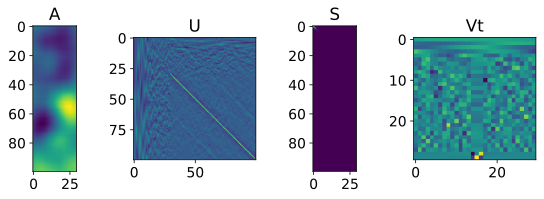

sum over total pecerntace variance is: 100.00000000000001


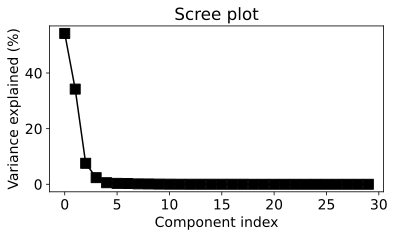

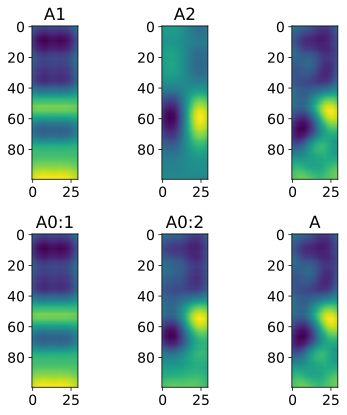

In [8]:
# Exer 5 - cont.
# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats(
    "svg"
)  # display figures in vector format
plt.rcParams.update({"font.size": 14})  # set global font size

U, s, Vt = np.linalg.svd(A)


S = np.zeros(A.shape)
np.fill_diagonal(S, s)

fig, axs = plt.subplots(1, 4, figsize=(8, 3))
axs[0].imshow(A)
axs[0].set_title("A")
axs[1].imshow(U)
axs[1].set_title("U")
axs[2].imshow(S)
axs[2].set_title("S")
axs[3].imshow(Vt)
axs[3].set_title("Vt")
plt.tight_layout()
plt.show()


percent_var = 100 * s / np.sum(s)
# plt.plot(percent_var,'ko-')
print(f"sum over total pecerntace variance is: {np.sum(percent_var)}")

plt.figure(figsize=(6, 3))
plt.plot(percent_var, "ks-", markersize=10)
plt.xlabel("Component index")
plt.ylabel("Variance explained (%)")
plt.title("Scree plot")
plt.show()


threshold = 10
# we set the number of layers calclated for variances above the threshold
NumLayers = len(percent_var[percent_var > threshold])
Layers = np.zeros((NumLayers, A.shape[0], A.shape[1]))
recons = np.zeros((NumLayers, A.shape[0], A.shape[1]))


fig, axs = plt.subplots(2, NumLayers + 1, figsize=(6, 6))
for i in range(NumLayers):
    Layers[i, :, :] = s[i] * np.outer(U[:, i], Vt[i, :])
    axs[0, i].imshow(Layers[i, :, :])
    axs[0, i].set_title(f"A{i+1}")
    recons[i, :, :] = np.sum(Layers[: i + 1, :, :], axis=0)
    axs[1, i].imshow(recons[i, :, :])
    axs[1, i].set_title(f"A0:{i+1}")

axs[0, -1].imshow(A)
axs[1, -1].set_title("A")
axs[1, -1].imshow(A)
plt.tight_layout()
plt.show()

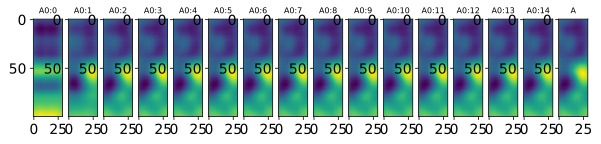

The last reconstruction has distance of 0.22 to the actual matrix


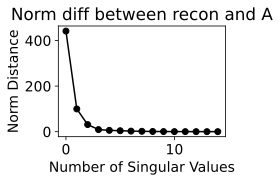

In [9]:
# Exer 5 - My own extension

Nexp = len(s) // 2
recons = np.zeros((Nexp, A.shape[0], A.shape[1]))
norm_list = np.zeros(Nexp)

fig, axs = plt.subplots(1, Nexp + 1, figsize=(10, 3))
for i in range(Nexp):
    NumLayers = i + 1
    Layers = np.zeros((NumLayers, A.shape[0], A.shape[1]))

    for j in range(NumLayers):
        Layers[j, :, :] = s[j] * np.outer(U[:, j], Vt[j, :])

    recons[i, :, :] = np.sum(Layers[:, :, :], axis=0)
    norm_list[i] = np.linalg.norm(A - recons[i, :, :], "fro")
    axs[i].imshow(recons[i, :, :])
    axs[i].set_title(f"A0:{i}", fontsize=8)

# plt.tight_layout()
axs[-1].imshow(A)
axs[-1].set_title(f"A", fontsize=8)
plt.show()
plt.figure(figsize=(3, 2))
plt.plot(norm_list, "ko-")
plt.ylabel("Norm Distance")
plt.xlabel("Number of Singular Values")
plt.title("Norm diff between recon and A")
print(
    f"The last reconstruction has distance of {np.round(norm_list[-1],2)} to the actual matrix"
)
plt.show()

In [10]:
# Exer 6
# create a random singular matrix with rank 3
A = np.random.randn(5, 3) @ np.random.randn(3, 5)


def PM_Pinverse(A):
    U, s, Vt = np.linalg.svd(A)
    S = np.zeros(A.shape)
    np.fill_diagonal(S, s)

    threshold = 0.001
    s = s[s > threshold]

    S_inv = S.copy()
    S_nonzero = np.diag(1 / s)
    S_inv[0 : len(s), 0 : len(s)] = S_nonzero

    return Vt.T @ S_inv @ U.T


print(np.round(PM_Pinverse(A) - np.linalg.pinv(A), 2))

[[-0. -0.  0.  0. -0.]
 [-0. -0.  0.  0. -0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0. -0.]]
